# Apple Quality Dataset on Kaggle

# Network Setting

### Asfandyar Khan
An input layer that matches the shape of our features, followed by two dense layers with 64 neurons each, using ReLU activation for non-linearity. Non-linearity is a crucial aspect of neural networks that allows them to capture complex patterns in the data which linear models cannot. The final layer uses a sigmoid activation function to output a probability indicating the likelihood of an apple being good or bad. This architecture is chosen for its simplicity yet effectiveness in binary classification tasks.
- Input layer followed by two dense hidden layers with 64 neurons each with RelU activation function, learning rate of 0.01 and a sigmoid activation function for the output layer. The model was run for 50 epochs for 10 times.

**Accuracy = 89.6 %**

### Caleb Tolman
Uses ReLU activation, CrossEntropyLoss function, Adam optimizer, Best observed Train Test Split of 60%, 20%, 20%, for training, validation and testing respectively.
- Input layer with 7 inputs followed by two hidden layers with 14 neurons each, learning rate of 0.01, for 200 epochs, and two ouputs. Run 50 times.

**Accuracy = 92 %**

### Nick
- Input layer with 7 inputs followed by two hidden layers with 15 neurons each, learning rate of 0.001, for 200 epochs, and two ouputs.

**Accuracy = 78 %**

### Awab Attieh
- Input layer with 7 inputs followed and one output, learning rate of 0.01, for 1000 epochs.

**Accuracy = 75 %**


# New York Housing Market Dataset on Kaggle
## Introduction
In this project, we model and predict real estate prices using a dataset that captures various characteristics of properties. Our objective was to explore different machine learning techniques, including linear regression, logistic regression, and neural networks, to identify the most effective approach for predicting property prices based on features like the number of bedrooms, bathrooms, property square footage, type, locality, and sub-locality.

The process began with preprocessing the data, where numerical features were standardized and categorical features were encoded to ensure our models could efficiently learn from the data. We meticulously split the dataset into training, validation, and test sets to evaluate the performance of our models under different configurations and ensure their generalizability.

## Methodology
Our methodology was comprehensive, starting with linear regression to establish a baseline for price prediction. We then explored logistic regression for a binary classification task, distinguishing properties priced above or below the median value. This step was crucial for understanding market segmentation based on price.

The most ambitious part of our project was the implementation of a neural network model. The chosen architecture aimed to capture complex nonlinear relationships within the data, potentially offering superior predictive performance. The model included layers of neurons with ReLU activation and dropout for regularization, all carefully tuned to optimize mean squared error on the validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns


# Load Dataset
df = pd.read_csv('/home/asfandyarkhan/Desktop/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

In [4]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [5]:
df = df.drop(['LONGITUDE', 'LATITUDE', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'MAIN_ADDRESS', 'STATE', 'ADDRESS', 'BROKERTITLE'], axis=1)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


In [6]:
# description of the data
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862
std,3.135525e+07,2.602315,1.946962,2377.140894
min,2.494000e+03,1.000000,0.000000,230.000000
25%,4.990000e+05,2.000000,1.000000,1200.000000
50%,8.250000e+05,3.000000,2.000000,2184.207862
75%,1.495000e+06,4.000000,3.000000,2184.207862
max,2.147484e+09,50.000000,50.000000,65535.000000


<Axes: xlabel='PRICE'>

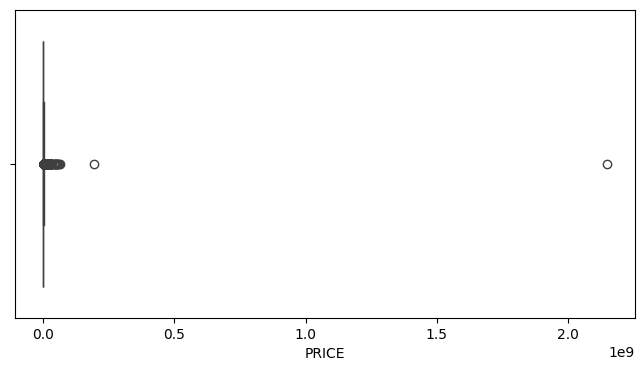

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='PRICE')


In [8]:
#Defining the Quartiles for removal of outliers
Q1=df['PRICE'].quantile(0.25)
Q3=df['PRICE'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((df['PRICE']<lowoutlier)|(df['PRICE']>highoutlier)).sum()
print('Total outliers: ',totaloutlier)

Total outliers:  559


In [9]:
# Removal of Outliers
df_new=df[(df['PRICE']<highoutlier)&(df['PRICE']>lowoutlier)]
#validating the removal of outlier
totaloutlier = ((df_new['PRICE']<lowoutlier)|(df_new['PRICE']>highoutlier)).sum()
print("Total Number of Outliers in the price are {}".format(totaloutlier))

Total Number of Outliers in the price are 0


In [10]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.242000e+03,4242.000000,4242.000000,4242.000000
mean,8.984895e+05,3.126827,2.097123,1848.546915
std,6.092312e+05,2.086537,1.306940,1018.885864
min,2.494000e+03,1.000000,0.000000,230.000000
25%,4.499992e+05,2.000000,1.000000,1100.500000
50%,7.490000e+05,3.000000,2.000000,2151.000000
75%,1.195000e+06,4.000000,2.373861,2184.207862
max,2.980000e+06,24.000000,24.000000,21000.000000


<Axes: xlabel='PRICE', ylabel='Count'>

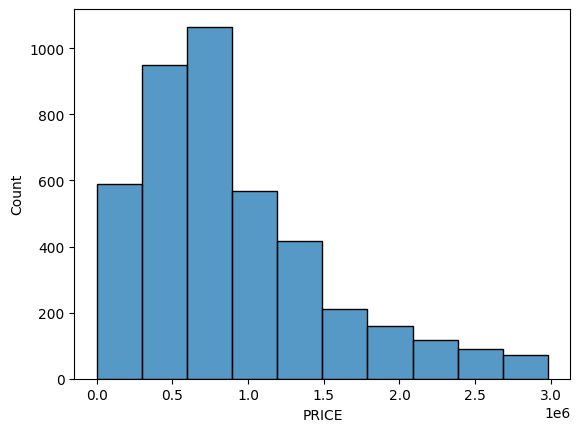

In [11]:
# checking price distribution 
sns.histplot(data=df_new,x='PRICE',bins=10)

<Axes: xlabel='BEDS'>

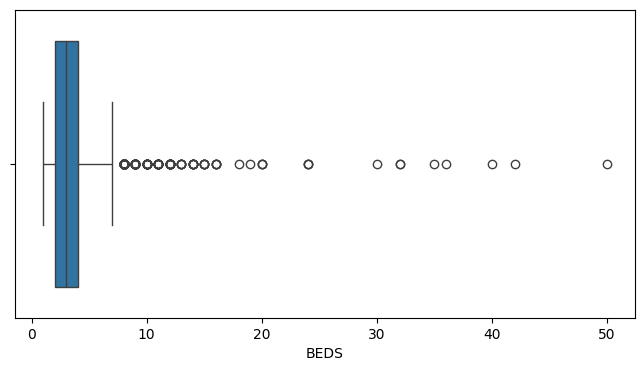

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='BEDS')

<Axes: xlabel='BEDS'>

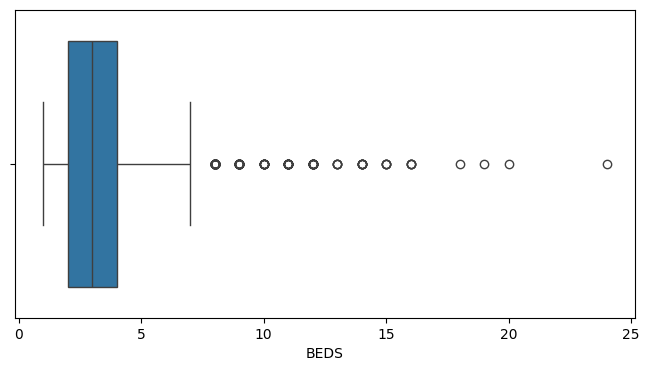

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_new,x='BEDS')

<Axes: xlabel='BATH'>

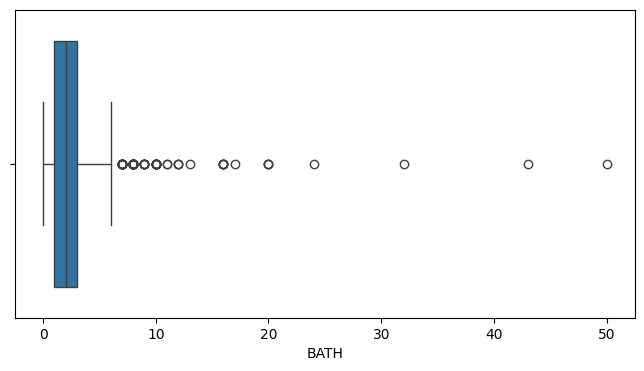

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='BATH')

<Axes: xlabel='BATH'>

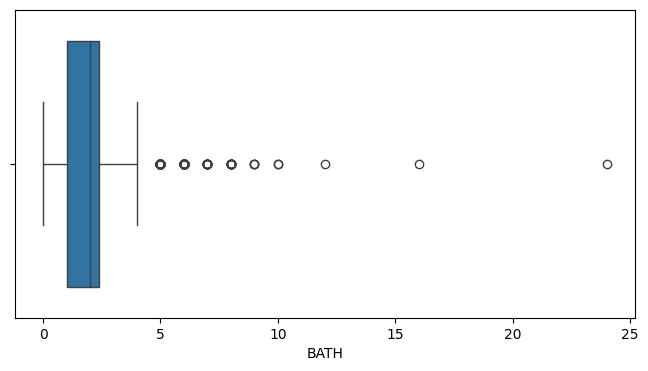

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_new,x='BATH')

<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

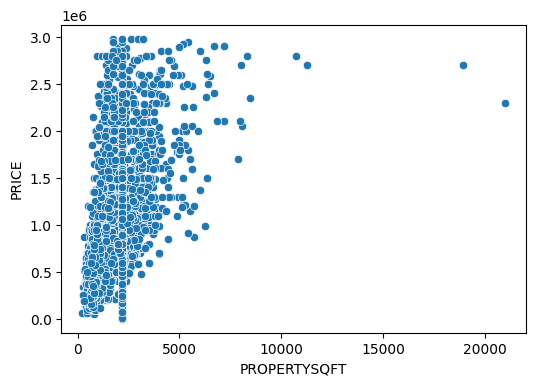

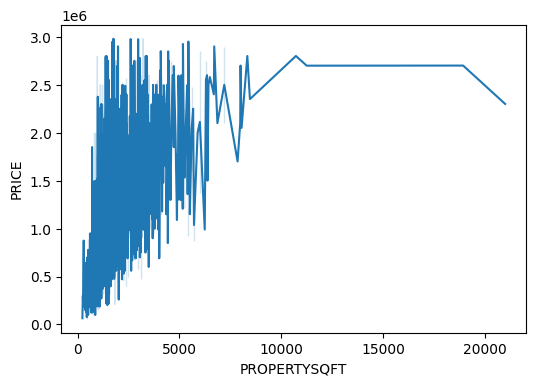

In [16]:
# Co-relation between price and property square feet
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_new,x='PROPERTYSQFT',y='PRICE')
# House price influence by no of beds and baths
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='PROPERTYSQFT',y='PRICE')

<Axes: xlabel='BATH', ylabel='PRICE'>

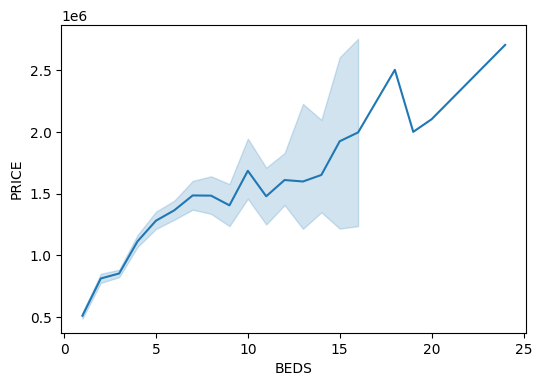

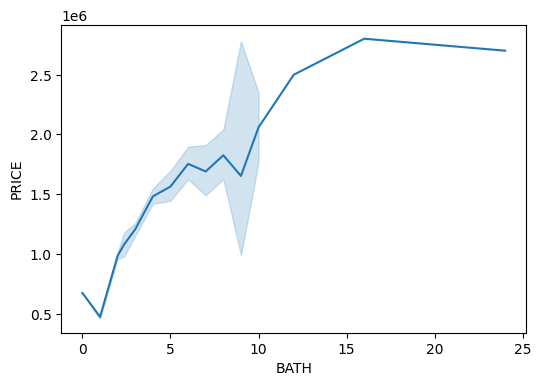

In [17]:
# House price influence by no of beds and baths
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BEDS',y='PRICE')
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BATH',y='PRICE')

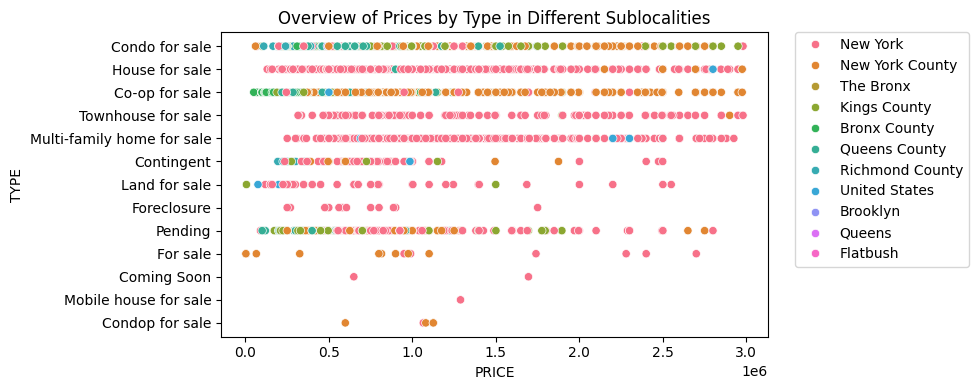

In [18]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_new, x='PRICE', y='TYPE', hue='LOCALITY')

# Move the legend to the right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Overview of Prices by Type in Different Sublocalities')
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

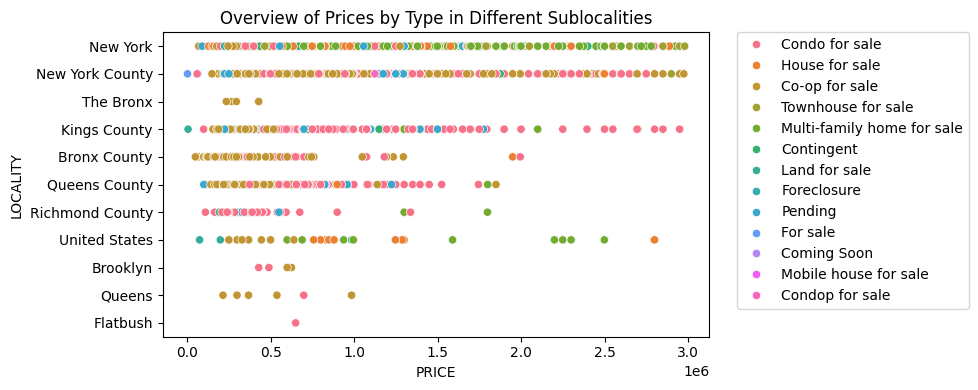

In [19]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_new, x='PRICE', y='LOCALITY', hue='TYPE')

# Move the legend to the right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Overview of Prices by Type in Different Sublocalities')
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

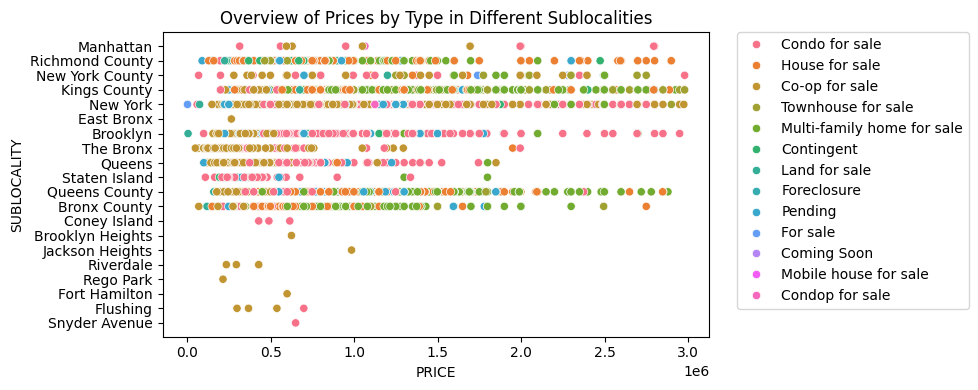

In [20]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_new, x='PRICE', y='SUBLOCALITY', hue='TYPE')

# Move the legend to the right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Overview of Prices by Type in Different Sublocalities')
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()


In [21]:
# Define features and target variable
X = df_new.drop('PRICE', axis=1)
y = df_new['PRICE']

## Preprocessing for Numerical and Categorical Data
Preprocessing is a crucial step to prepare data for machine learning models. For numerical features ('BEDS', 'BATH', 'PROPERTYSQFT'), we standardize them using StandardScaler to have a mean of 0 and a standard deviation of 1, which helps in faster convergence during training. Categorical features ('TYPE', 'LOCALITY', 'SUBLOCALITY') are transformed using OneHotEncoder, converting them into a binary matrix representation. This is essential because models cannot work directly with categorical data.

In [ ]:
# Preprocessing for numerical and categorical data
numerical_features = ['BEDS', 'BATH', 'PROPERTYSQFT']
categorical_features = ['TYPE', 'LOCALITY', 'SUBLOCALITY']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features)
    ])

## Linear and Logistic Regression Models
Linear Regression is used for predicting continuous values, making it suitable for predicting house prices based on various features. Logistic Regression, although a regression algorithm, is used for binary classification tasks. Here, it could be used to classify houses into categories (e.g., above or below median price) based on similar features.

## Neural Network Model
The Neural Network model, built with an enhanced architecture including multiple dense layers and dropout for regularization, is used for its capability to capture complex nonlinear relationships in the data. The specific architecture (128-64-32 neurons) is chosen to provide sufficient model complexity for capturing the underlying patterns in the dataset without being overly complex to avoid overfitting. The choice of adam optimizer and mean_squared_error loss function is standard for regression tasks, aiming to minimize the difference between predicted and actual prices.

## Training and Evaluation
Each model is trained on the preprocessed training data and evaluated on the validation set. The use of mean squared error (MSE) as a metric allows comparison across models by measuring the average squared difference between predicted and actual values. For the Logistic Regression model, additional metrics like accuracy, precision, recall, and F1 score provide insights into the model's classification performance

## Metrics Summary
A summary table consolidates key performance metrics for each model, facilitating a clear comparison. This table highlights the strengths and weaknesses of each model across different evaluation metrics.

## Visualization of Predictions
Visualizations are crucial for interpreting model performance. Plots comparing predicted vs. actual prices for each model provide a visual assessment of how well the models are predicting house prices. The ideal line indicates perfect predictions, with deviations representing prediction errors.

## Confusion Matrix for Logistic Regression
The confusion matrix visually represents the performance of the Logistic Regression model in classification tasks, showing the true vs. predicted labels. This helps in understanding the model's ability to classify houses correctly based on the median price.

## Neural Network Loss Plot
The loss plot for the Neural Network model displays the training and validation loss over epochs, illustrating how the model's performance improves over time. A converging plot indicates good learning, while diverging lines may signal overfitting or underfitting.

## Results
Through iterative experiments, we evaluated each model's performance using metrics such as Mean Squared Error (MSE) for regression tasks and accuracy, precision, recall, and F1 score for the classification task. The neural network showed promising results, albeit with challenges in ensuring its predictions were well-calibrated and meaningful.

Epoch 1/500


/home/asfandyarkhan/miniconda3/envs/tesnorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/asfandyarkhan/miniconda3/envs/tesnorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/asfandyarkhan/miniconda3/envs/tesnorflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


89/89 [==============================] - 1s 3ms/step - loss: 1192200241152.0000 - val_loss: 1060678795264.0000
Epoch 2/500
89/89 [==============================] - 0s 3ms/step - loss: 1187963600896.0000 - val_loss: 1048875433984.0000
Epoch 3/500
89/89 [==============================] - 0s 4ms/step - loss: 1150744920064.0000 - val_loss: 980842840064.0000
Epoch 4/500
89/89 [==============================] - 0s 4ms/step - loss: 1017988317184.0000 - val_loss: 793186140160.0000
Epoch 5/500
89/89 [==============================] - 0s 4ms/step - loss: 751075065856.0000 - val_loss: 502515204096.0000
Epoch 6/500
89/89 [==============================] - 0s 4ms/step - loss: 447119687680.0000 - val_loss: 276445396992.0000
Epoch 7/500
89/89 [==============================] - 0s 3ms/step - loss: 289551482880.0000 - val_loss: 210570362880.0000
Epoch 8/500
89/89 [==============================] - 0s 3ms/step - loss: 250306314240.0000 - val_loss: 197431771136.0000
Epoch 9/500
89/89 [===================

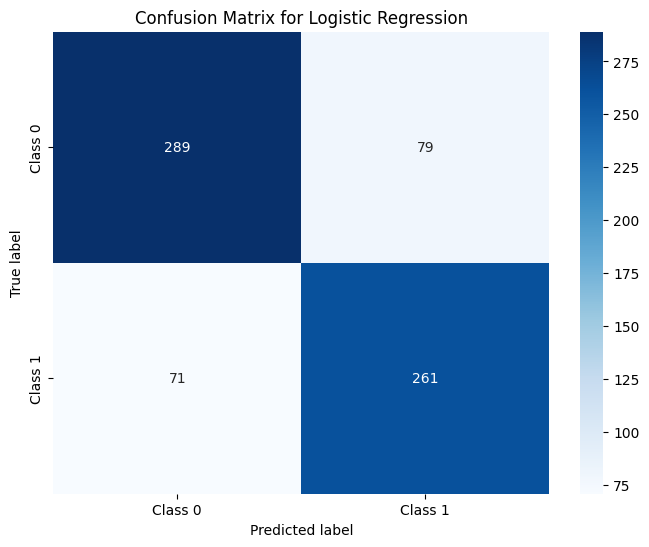

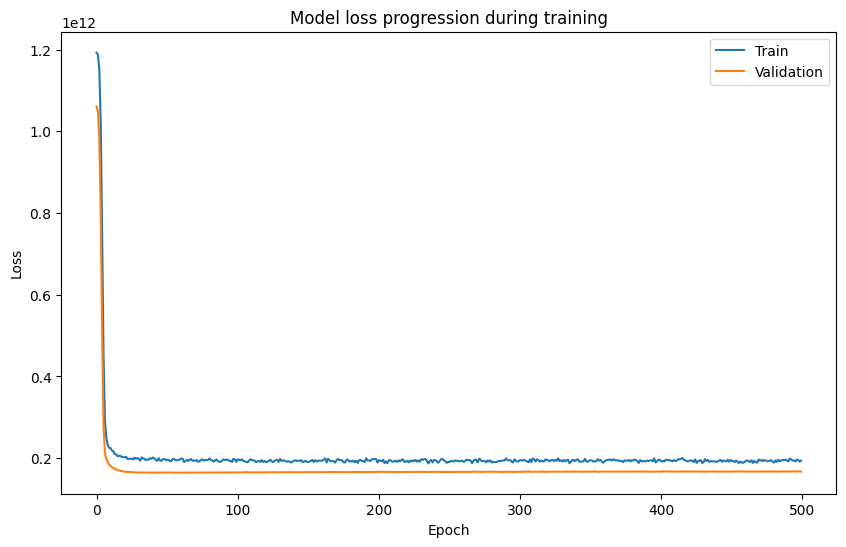

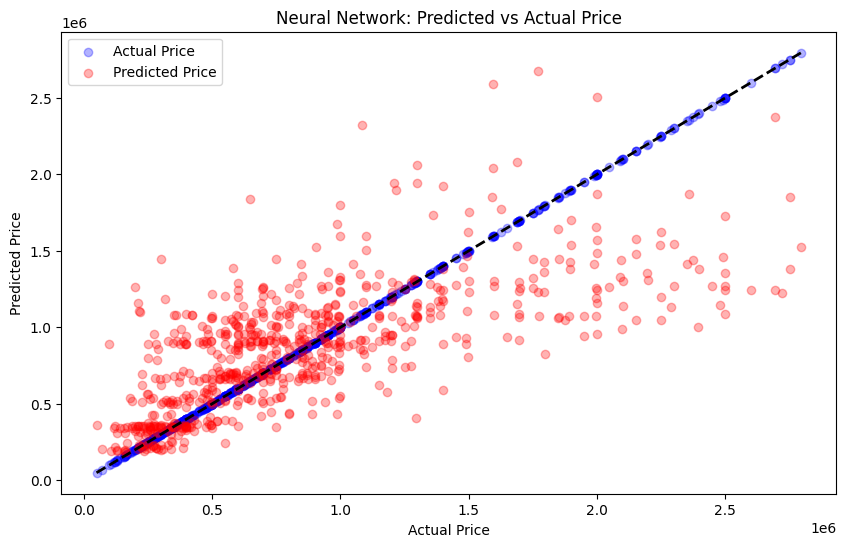

In [29]:


n_iterations = 1

# Scores containers
mse_lr_scores = []
accuracy_log_scores = []
precision_log_scores = []
recall_log_scores = []
f1_log_scores = []
mse_nn_scores = []

for iteration in range(n_iterations):
    random_state = np.random.randint(0, 10000)

    # Split data into training and temporary sets (2/3 training, 1/3 temporary)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=random_state)

    # Further split temporary set into validation and test sets equally
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

    # Prepare binary targets for classification tasks
    y_binary = (y > y.median()).astype(int)

    y_train_binary, y_temp_binary = train_test_split(y_binary, test_size=0.33, random_state=random_state)
    y_val_binary, y_test_binary = train_test_split(y_temp_binary, test_size=0.5, random_state=random_state)

    

    # Linear Regression Model
    lr_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    
    # Logistic Regression Model
    log_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=100))
    ])

    # Linear Regression
    lr_model = lr_pipeline.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_val)
    mse_lr = mean_squared_error(y_val, y_pred_lr)
    mse_lr_scores.append(mse_lr)

    # Logistic Regression
    log_model = log_pipeline.fit(X_train, y_train_binary)
    y_pred_log = log_model.predict(X_val)

    accuracy_log = accuracy_score(y_val_binary, y_pred_log)
    precision_log = precision_score(y_val_binary, y_pred_log)
    recall_log = recall_score(y_val_binary, y_pred_log)
    f1_log = f1_score(y_val_binary, y_pred_log)
    
    accuracy_log_scores.append(accuracy_log)
    precision_log_scores.append(precision_log)
    recall_log_scores.append(recall_log)
    f1_log_scores.append(f1_log)
    
    # Neural Network Model
       # Neural Network
    def build_enhanced_model(input_dim):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(input_dim,)),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1)  # No activation function for the output layer in regression
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    # Correct the preprocessing step
    preprocessor.fit(X_train)
    X_train_preprocessed = preprocessor.transform(X_train)
    X_val_preprocessed = preprocessor.transform(X_val)  # Use X_val

    # Define input_dim for the Neural Network model
    input_dim = X_train_preprocessed.shape[1]  # Number of input features
    # Build and compile the enhanced Neural Network model
    nn_model = build_enhanced_model(input_dim)
    # Train the Neural Network model
    history = nn_model.fit(X_train_preprocessed, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_val_preprocessed, y_val))
    # Predict with the Neural Network model
    y_pred_nn = nn_model.predict(X_val_preprocessed).flatten()  # Flatten to ensure the prediction shape matches y_val
    # Calculate MSE for the Neural Network predictions
    mse_nn = mean_squared_error(y_val, y_pred_nn)
    mse_nn_scores.append(mse_nn)


# Calculate and print average scores
avg_mse_lr = np.mean(mse_lr_scores)
avg_accuracy_log = np.mean(accuracy_log_scores)
avg_precision_log = np.mean(precision_log_scores)
avg_recall_log = np.mean(recall_log_scores)
avg_f1_log = np.mean(f1_log_scores)
avg_mse_nn = np.mean(mse_nn_scores)  # Assuming you have this value from the NN part


metrics_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Neural Network'],
    'MSE': [avg_mse_lr, 'N/A', avg_mse_nn],
    'Accuracy': ['N/A', avg_accuracy_log, 'N/A'],
    'Precision': ['N/A', avg_precision_log, 'N/A'],
    'Recall': ['N/A', avg_recall_log, 'N/A'],
    'F1 Score': ['N/A', avg_f1_log, 'N/A']
})

print(metrics_summary)

def plot_predictions_vs_actual(y_actual, y_predicted, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_actual, alpha=0.3, label='Actual Price', color='blue')
    plt.scatter(y_actual, y_predicted, alpha=0.3, label='Predicted Price', color='red')
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name}: Predicted vs Actual Price')
    plt.legend()
    plt.show()

conf_matrix = confusion_matrix(y_val_binary, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



# For Neural Network predictions
plot_predictions_vs_actual(y_val, y_pred_nn.flatten(), "Neural Network")  # Note: y_pred_nn might need flattening depending on output shape


## Conclusion
This project demonstrated the power and versatility of machine learning in real estate price prediction. While linear and logistic regression provided solid baselines, the neural network's capacity to model complex patterns held potential for more accurate predictions. However, the effectiveness of such models hinges on careful preprocessing, model selection, and hyperparameter tuning. Future work could explore more advanced neural network architectures, feature engineering, and techniques to address overfitting, ultimately pushing the boundaries of what's possible in predictive modeling for real estate.